In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
from modules.utils_data import load_data, plot_property_histograms, compare_distributions

This project utilizes the PHYSPROP data as curated and published by Mansouri et al.

Loading data from file
File not found, reading from SDF files
Reading OPERA_Data/VP_QR.sdf


100%|██████████| 2819/2819 [00:00<00:00, 7649.94it/s]


Reading OPERA_Data/LogP_QR.sdf


  0%|          | 0/13963 [00:00<?, ?it/s][16:54:57] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 12 22 23 24 25 26 27
[16:54:57] ERROR: Could not sanitize molecule ending on line 38202
[16:54:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 12 22 23 24 25 26 27
100%|██████████| 13963/13963 [00:02<00:00, 5786.45it/s]


Reading OPERA_Data/AOH_QR.sdf


100%|██████████| 692/692 [00:00<00:00, 11049.37it/s]


Reading OPERA_Data/BCF_QR.sdf


  0%|          | 0/626 [00:00<?, ?it/s][16:54:59] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 12 22 23 24 25 26 27
[16:54:59] ERROR: Could not sanitize molecule ending on line 5019
[16:54:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 12 22 23 24 25 26 27
100%|██████████| 626/626 [00:00<00:00, 6935.19it/s]


Reading OPERA_Data/Biodeg_QR.sdf


100%|██████████| 150/150 [00:00<00:00, 6919.77it/s]


Reading OPERA_Data/BP_QR.sdf


100%|██████████| 5434/5434 [00:00<00:00, 9630.54it/s]


Reading OPERA_Data/Clint_QR.sdf


100%|██████████| 551/551 [00:00<00:00, 5304.32it/s]


Reading OPERA_Data/FU_QR.sdf


100%|██████████| 1613/1613 [00:00<00:00, 4445.57it/s]


Reading OPERA_Data/HL_QR.sdf


100%|██████████| 697/697 [00:00<00:00, 8146.69it/s]


Reading OPERA_Data/KM_QR.sdf


100%|██████████| 541/541 [00:00<00:00, 6627.18it/s]


Reading OPERA_Data/KOA_QR.sdf


100%|██████████| 270/270 [00:00<00:00, 7880.68it/s]


Reading OPERA_Data/KOC_QR.sdf


100%|██████████| 728/728 [00:00<00:00, 6605.13it/s]


Reading OPERA_Data/MP_QR.sdf


  0%|          | 0/8698 [00:00<?, ?it/s][16:55:01] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 12 22 23 24 25 26 27
[16:55:01] ERROR: Could not sanitize molecule ending on line 52970
[16:55:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 12 22 23 24 25 26 27
100%|██████████| 8698/8698 [00:01<00:00, 6892.99it/s]


Reading OPERA_Data/WS_QR.sdf


100%|██████████| 5269/5269 [00:00<00:00, 6746.73it/s]


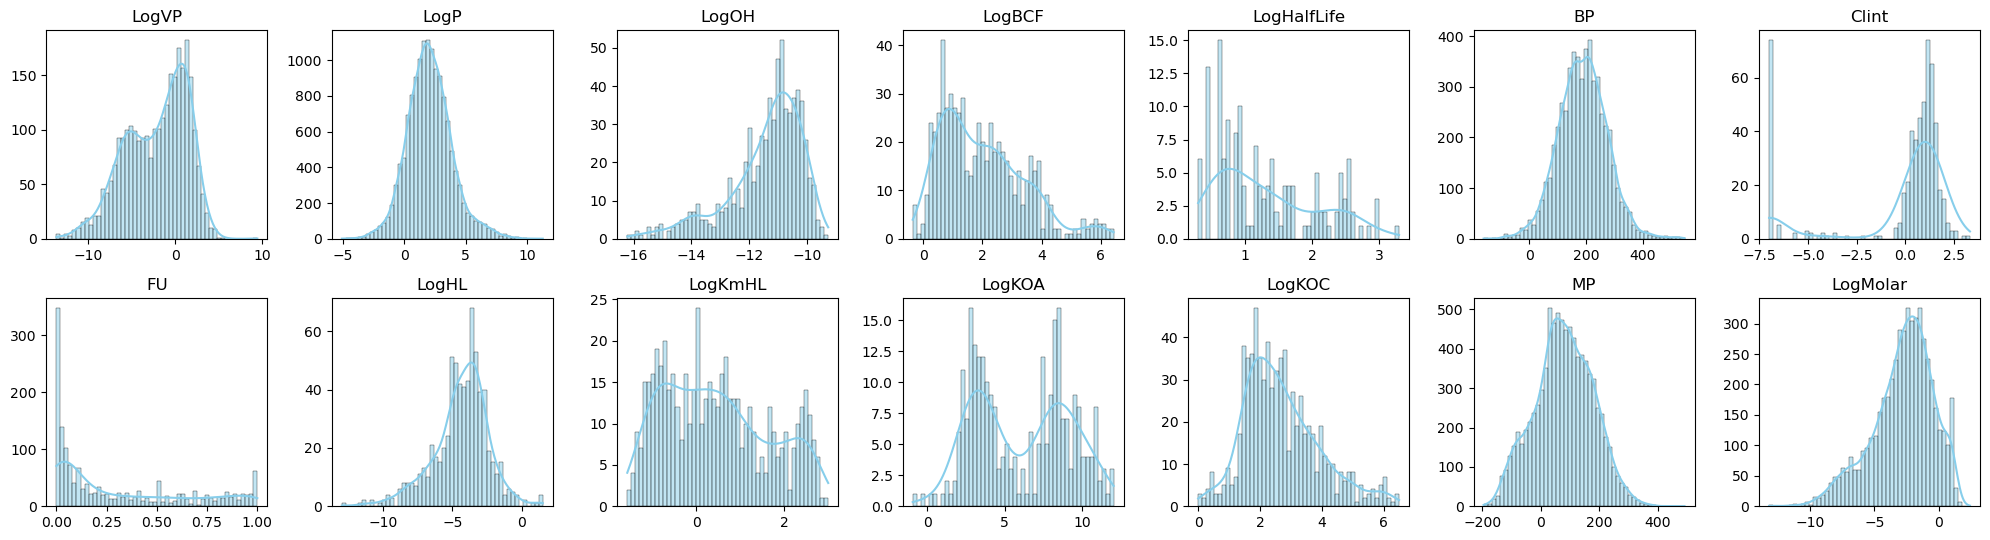

In [2]:
# Load the data
df_combined = load_data()

# Plot the histograms of the properties
plot_property_histograms(df_combined)

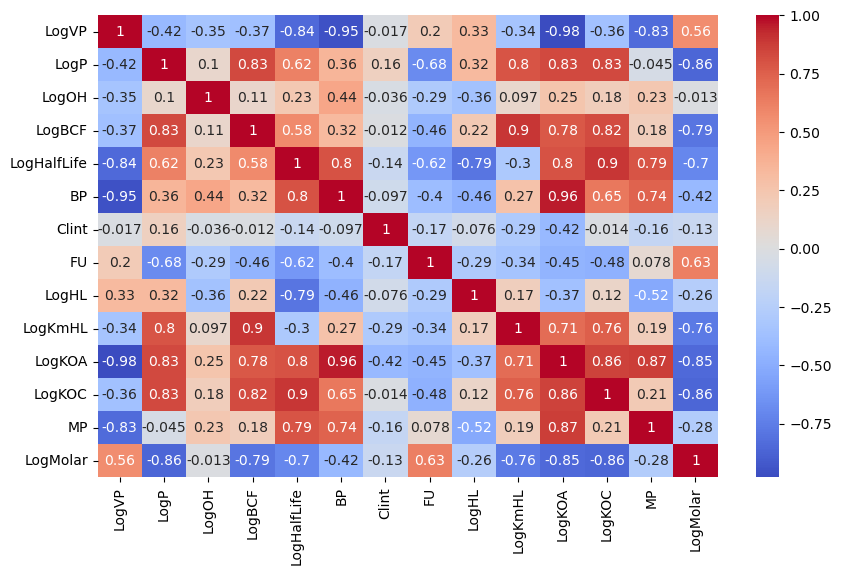

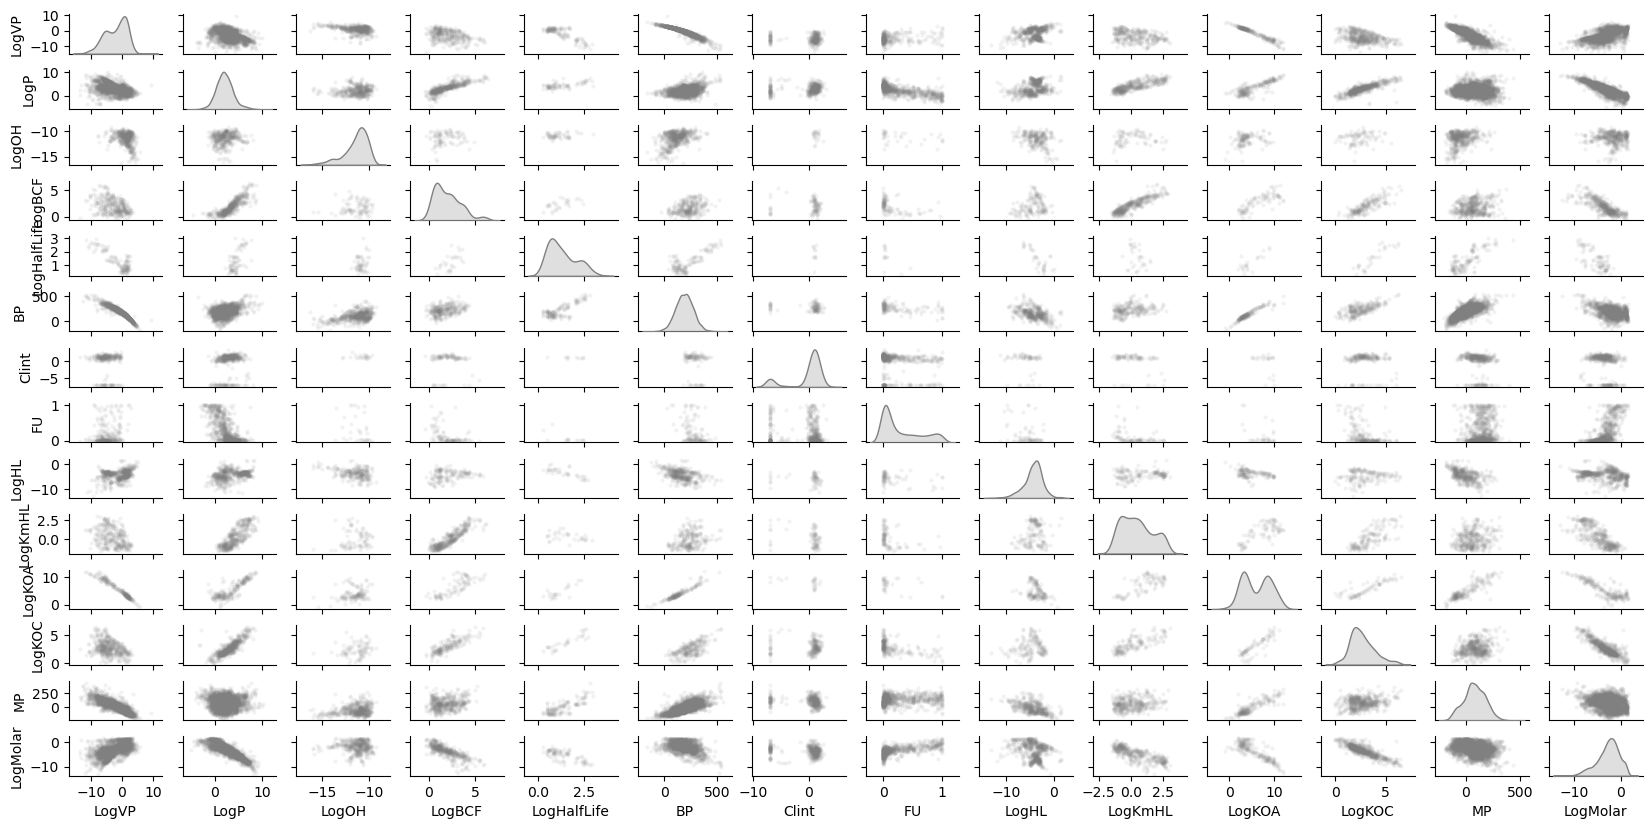

In [3]:
plt.figure(figsize=(10, 6))
# Correlation matrix
sns.heatmap(df_combined.drop(columns="SMILES").corr(), annot=True, cmap="coolwarm")
# All pairwise relations (this takes ~20 seconds)
sns.pairplot(df_combined.drop(columns="SMILES"), height=0.6, aspect=2, diag_kind="kde", markers=".", plot_kws={"alpha": 0.1, "linewidth": 0, "color": "gray"}, diag_kws={"color": "gray"})

In [4]:
#split check: if we do a random split 80/20, do we also get a 80/20 split for each property?
train, test = train_test_split(df_combined, test_size=0.2, random_state=42)
for col in df_combined.columns[1:]:
    print(f'{col}: {test[col].count()/df_combined[col].count()}')

LogVP: 0.21598579040852575
LogP: 0.20183552018355203
LogOH: 0.24132947976878613
LogBCF: 0.1762820512820513
LogHalfLife: 0.24666666666666667
BP: 0.21295785017485735
Clint: 0.1813186813186813
FU: 0.18629283489096574
LogHL: 0.21377331420373027
LogKmHL: 0.1922365988909427
LogKOA: 0.2074074074074074
LogKOC: 0.21023513139695713
MP: 0.20134228187919462
LogMolar: 0.19919478527607362


LogVP: MannwhitneyuResult(statistic=653159.5, pvalue=0.31668653496008226)
LogP: MannwhitneyuResult(statistic=15763054.5, pvalue=0.6195144197938758)
LogOH: MannwhitneyuResult(statistic=43675.0, pvalue=0.9426059165069719)
LogBCF: MannwhitneyuResult(statistic=29074.5, pvalue=0.6394069864890037)
LogHalfLife: MannwhitneyuResult(statistic=1868.5, pvalue=0.33363017346611834)
BP: MannwhitneyuResult(statistic=2440982.5, pvalue=0.4898752284175365)
Clint: MannwhitneyuResult(statistic=22770.0, pvalue=0.6503379893568134)
FU: MannwhitneyuResult(statistic=200757.0, pvalue=0.44591948927821956)
LogHL: MannwhitneyuResult(statistic=40943.5, pvalue=0.9571847906634039)
LogKmHL: MannwhitneyuResult(statistic=24510.5, pvalue=0.21255245604519624)
LogKOA: MannwhitneyuResult(statistic=5950.5, pvalue=0.9371821073625608)
LogKOC: MannwhitneyuResult(statistic=42605.0, pvalue=0.72975230295574)
MP: MannwhitneyuResult(statistic=6049215.5, pvalue=0.6325053313509037)
LogMolar: MannwhitneyuResult(statistic=2142209.5, pval

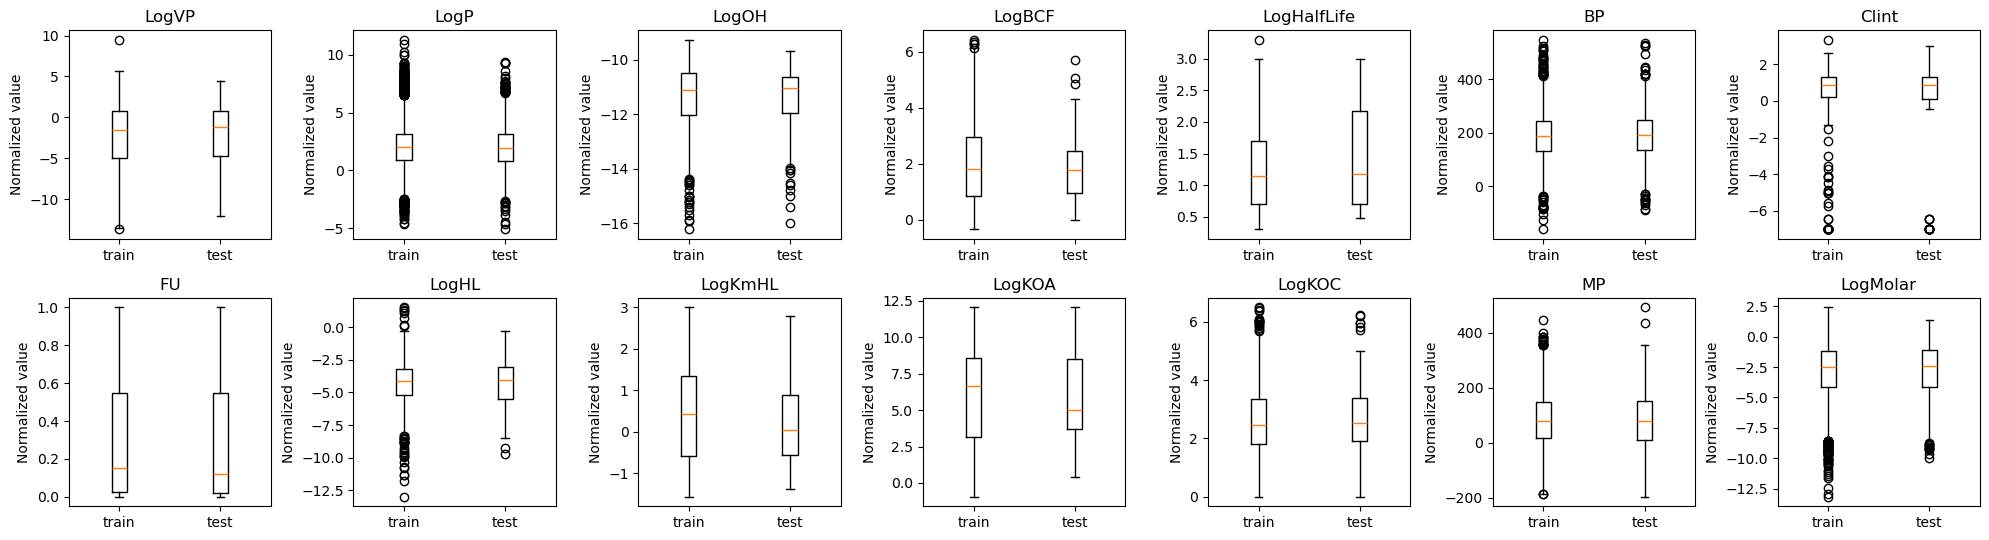

In [5]:
compare_distributions(df_combined, train, test)

In [6]:
print(f'duplicated smiles: {df_combined.SMILES.duplicated().sum()}')
if not os.path.exists('data'):
    os.makedirs('data')
train.to_csv('data/train.csv',index=False)
test.to_csv('data/test.csv',index=False)
print(f'Number of training datapoints: {len(train)}\nNumber of test datapoints: {len(test)}')

duplicated smiles: 0
Number of training datapoints: 18582
Number of test datapoints: 4646
